## Открытие файлов с данными и изучние общей информации

Для начала создадим 5 датафреймов с информацией о пользователях, их звонках, интернет-сессиях, сообщениях, тарифах:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st


df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

## Подготовка данных

### Приведение данных к нужным типам, исправление ошибок

Откроем файл `df_calls` с информацией о звонках и проанализируем его:

In [2]:
df_calls.info()
df_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Приведем дату звонка к формату даты с помощью `to_datetime`. Работать с уникальным номером звонка удобнее в качестве числа, поэтому приведем тип этого столбца к `int64`:

In [3]:
df_calls['id'] = df_calls['id'].astype('int64')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

df_calls.info()
df_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int64         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.2 MB


,id,call_date,duration,user_id
0,10000,2018-07-25,0.00,1000
1,10001,2018-08-17,0.00,1000
2,10002,2018-06-11,2.85,1000
3,10003,2018-09-21,13.80,1000
4,10004,2018-12-15,5.18,1000
5,10005,2018-11-02,0.00,1000
6,10006,2018-10-18,0.00,1000
7,10007,2018-08-22,18.31,1000
8,10008,2018-09-15,18.44,1000
9,10009,2018-08-15,0.00,1000


In [4]:
df_calls.groupby('user_id').count()

,id,call_date,duration
user_id,,,
1000,368,368,368
1001,122,122,122
1002,217,217,217
1003,520,520,520
1004,176,176,176
...,...,...,...
1495,565,565,565
1496,828,828,828
1497,201,201,201


Из полученного результата следует, что информация о звонках 8 пользователей отсутствует, однако в остальных значениях пропусков нет.

Откроем файл `df_internet` и проанализируем его:

In [5]:
df_internet.info()
df_internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Как и в предыдущем столбце, приводим дату - к формату `datetime64[ns]`, уникальный номер сессии - к `int64`. Также можем заметить, что в данных появился столбец `Unnamed: 0`, значения которого дублируют порядковый номер строк - удалим его за ненадобностью:

In [6]:
df_internet['id'] = df_internet['id'].astype('int64')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet = df_internet[['id', 'mb_used', 'session_date', 'user_id']]

df_internet.info()
df_internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int64         
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.6 MB


,id,mb_used,session_date,user_id
0,10000,112.95,2018-11-25,1000
1,10001,1052.81,2018-09-07,1000
2,10002,1197.26,2018-06-25,1000
3,10003,550.27,2018-08-22,1000
4,10004,302.56,2018-09-24,1000
5,10005,399.97,2018-10-02,1000
6,10006,540.08,2018-09-07,1000
7,10007,415.70,2018-07-11,1000
8,10008,505.40,2018-10-08,1000
9,10009,345.54,2018-09-03,1000


In [7]:
df_internet.groupby('user_id').count()

,id,mb_used,session_date
user_id,,,
1000,211,211,211
1001,96,96,96
1002,369,369,369
1003,104,104,104
1004,300,300,300
...,...,...,...
1495,254,254,254
1496,834,834,834
1497,121,121,121


Из полученного результата следует, что информация о интернет-сессиях 3 пользователей отсутствует, однако в остальных значениях пропусков нет.

Откроем файл `df_messages` и проанализируем его:

In [8]:
df_messages.info()
df_messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Как и в предыдущем столбце, приводим дату - к формату `datetime64[ns]`, уникальный номер сессии - к `int64`:

In [9]:
df_messages['id'] = df_messages['id'].astype('int64')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

df_messages.info()
df_messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int64         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000
5,10005,2018-06-20,1000
6,10006,2018-11-19,1000
7,10007,2018-10-29,1000
8,10008,2018-06-25,1000
9,10009,2018-12-18,1000


In [10]:
df_messages.groupby('user_id').count()

,id,message_date
user_id,,
1000,496,496
1002,70,70
1003,380,380
1004,1192,1192
1005,552,552
...,...,...
1495,340,340
1496,468,468
1497,51,51


Из полученного результата следует, что информация о сообщениях 74 пользователей отсутствует, однако в остальных значениях пропусков нет.

Откроем файл `df_tariffs` и проанализируем его:

In [11]:
df_tariffs.info()
df_tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Из полученного результата следует, пропусков, ошибок нет, информация корректна.

Откроем файл `df_users` и проанализируем его:

In [12]:
df_users.info()
df_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Приводим дату к формату `datetime64[ns]`, а также посчитаем количество пользователей:

In [13]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')

In [14]:
df_users.count()

user_id       500
age           500
churn_date     38
city          500
first_name    500
last_name     500
reg_date      500
tariff        500
dtype: int64

Данные о всех пользователях корректные, все 500 пользователей есть в выборке. Пропусков нет, кроме столбца `churn_date`, в котором только есть только 38 значений. Однако ошибкой это не является, т.к. это означает, что остальные 464 пользователей не прекращали пользоваться тарифом на момент выгрузки данных.

Сделаем проверку на наличие дубликатов в датасетах:

In [15]:
df_calls.duplicated().sum()

0

In [16]:
df_internet.duplicated().sum()

0

In [17]:
df_messages.duplicated().sum()

0

In [18]:
df_tariffs.duplicated().sum()

0

In [19]:
df_users.duplicated().sum()

0

Из полученных результатов следует, что дубликаты в датасетах отсутствуют.

### Определение дополнительной информации о пользователях

Необходимо определить помесячную выручку с каждого пользователя, которая состоит из абонентской платы и дополнительной платы за превышение тарифного плана.

Для начала добавим в таблицы с информацией и звонках, интернет-сессии и сообщениях пользователя значения месяцев:

In [20]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

Определим количество сделанных звонков по месяцам:

In [21]:
df_calls_months = df_calls.pivot_table(index = 'user_id', values = 'id', columns = 'month', aggfunc = 'count')
df_calls_months

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,112.0,152.0,129.0,155.0
1496,7.0,77.0,79.0,67.0,63.0,74.0,73.0,88.0,68.0,72.0,80.0,80.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,64.0,71.0


Для удобства работы с таблицей тарифного плана переименуем столбец с названием тарифа:

In [22]:
df_tariffs = df_tariffs.rename(columns = {'tariff_name' : 'tariff'})

Объединим таблицы с информацией о пользователях, их звонках, округленных по условию тарифа, а также таблицу с тарифами в одну - `df_calls_total`:

In [23]:
df_calls_total = df_calls.merge(df_users, on = 'user_id')
df_calls_total = df_calls_total.merge(df_tariffs, on = 'tariff')
df_calls_total['duration'] = np.ceil(df_calls['duration'])
df_calls_total.head(10)

,id,call_date,duration,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,10000,2018-07-25,0.0,1000,7,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,10001,2018-08-17,0.0,1000,8,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,10002,2018-06-11,3.0,1000,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,10003,2018-09-21,14.0,1000,9,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,10004,2018-12-15,6.0,1000,12,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,10005,2018-11-02,0.0,1000,11,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,10006,2018-10-18,0.0,1000,10,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,10007,2018-08-22,19.0,1000,8,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,10008,2018-09-15,19.0,1000,9,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
9,10009,2018-08-15,0.0,1000,8,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Создадим сводную таблицу с суммарной помесячной продолжительностью звонков пользователей `df_duration_total` и добавим в нее столбцы с информацией о ежемесячной абонентской плате в рублях, количестве минут разговора в месяц, включённых в абонентскую плату и о стоимости минуты разговора сверх тарифного пакета:

In [24]:
df_duration_total = df_calls_total.pivot_table(index = 'user_id', values = 'duration', columns = 'month', aggfunc = 'sum')
df_duration_tariff = df_calls_total[['user_id', 'minutes_included', 'rub_per_minute', 'rub_monthly_fee']]
df_duration_total = df_duration_total.merge(df_duration_tariff, on = 'user_id')
df_duration_total = df_duration_total.drop_duplicates().reset_index(drop = True)
df_duration_total.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,minutes_included,rub_per_minute,rub_monthly_fee
0,1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,3000,1,1950
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0,459.0,500,3,550
2,1002,NaN,NaN,NaN,NaN,NaN,102.0,184.0,308.0,249.0,178.0,222.0,216.0,500,3,550
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.0,1052.0,766.0,846.0,716.0,3000,1,1950
4,1004,NaN,NaN,NaN,NaN,43.0,236.0,96.0,219.0,200.0,256.0,162.0,149.0,3000,1,1950
5,1005,105.0,493.0,622.0,716.0,460.0,643.0,528.0,452.0,434.0,766.0,519.0,541.0,500,3,550
6,1006,NaN,10.0,370.0,344.0,419.0,397.0,332.0,285.0,423.0,348.0,389.0,368.0,500,3,550
7,1007,NaN,NaN,NaN,162.0,520.0,521.0,514.0,526.0,581.0,473.0,654.0,505.0,500,3,550
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.0,500,3,550
9,1009,NaN,NaN,81.0,261.0,187.0,208.0,197.0,212.0,200.0,150.0,289.0,247.0,500,3,550


Создадим 12 столбцов, которые будут показывать разницу между использованными минутами и количеством минут разговора в месяц:

In [25]:
for index in range(12):
    df_duration_total['income per ' + str(index + 1)] = df_duration_total[index + 1] - df_duration_total['minutes_included']
    
df_duration_total.head(10)

,user_id,1,2,3,4,5,6,7,8,9,...,income per 3,income per 4,income per 5,income per 6,income per 7,income per 8,income per 9,income per 10,income per 11,income per 12
0,1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,...,NaN,NaN,-2841.0,-2828.0,-2660.0,-2592.0,-2534.0,-2650.0,-2662.0,-2667.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-69.0,-41.0
2,1002,NaN,NaN,NaN,NaN,NaN,102.0,184.0,308.0,249.0,...,NaN,NaN,NaN,-398.0,-316.0,-192.0,-251.0,-322.0,-278.0,-284.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.0,1052.0,...,NaN,NaN,NaN,NaN,NaN,-2671.0,-1948.0,-2234.0,-2154.0,-2284.0
4,1004,NaN,NaN,NaN,NaN,43.0,236.0,96.0,219.0,200.0,...,NaN,NaN,-2957.0,-2764.0,-2904.0,-2781.0,-2800.0,-2744.0,-2838.0,-2851.0
5,1005,105.0,493.0,622.0,716.0,460.0,643.0,528.0,452.0,434.0,...,122.0,216.0,-40.0,143.0,28.0,-48.0,-66.0,266.0,19.0,41.0
6,1006,NaN,10.0,370.0,344.0,419.0,397.0,332.0,285.0,423.0,...,-130.0,-156.0,-81.0,-103.0,-168.0,-215.0,-77.0,-152.0,-111.0,-132.0
7,1007,NaN,NaN,NaN,162.0,520.0,521.0,514.0,526.0,581.0,...,NaN,-338.0,20.0,21.0,14.0,26.0,81.0,-27.0,154.0,5.0
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-136.0
9,1009,NaN,NaN,81.0,261.0,187.0,208.0,197.0,212.0,200.0,...,-419.0,-239.0,-313.0,-292.0,-303.0,-288.0,-300.0,-350.0,-211.0,-253.0


Изменим значения в полученных столбцах: если значения <= 0, пользователь не превысил норму тарифа - выручка составляет размер абонентской платы; если же значения > 0, пользователь превысил норму тарифа - выручка составляет размер абонентской платы + сумма за использование дополнительных минут:

In [26]:
for index in range(12):
    df_duration_total['income per ' + str(index + 1)] = np.where(df_duration_total['income per ' + str(index + 1)] <= 0, 
                                                                 df_duration_total['rub_monthly_fee'], 
                                                                 df_duration_total['income per ' + str(index + 1)] * df_duration_total['rub_per_minute'] + df_duration_total['rub_monthly_fee'])
    
df_duration_total.head(10)

,user_id,1,2,3,4,5,6,7,8,9,...,income per 3,income per 4,income per 5,income per 6,income per 7,income per 8,income per 9,income per 10,income per 11,income per 12
0,1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,...,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,550.0
2,1002,NaN,NaN,NaN,NaN,NaN,102.0,184.0,308.0,249.0,...,NaN,NaN,NaN,550.0,550.0,550.0,550.0,550.0,550.0,550.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.0,1052.0,...,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,NaN,NaN,NaN,NaN,43.0,236.0,96.0,219.0,200.0,...,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
5,1005,105.0,493.0,622.0,716.0,460.0,643.0,528.0,452.0,434.0,...,916.0,1198.0,550.0,979.0,634.0,550.0,550.0,1348.0,607.0,673.0
6,1006,NaN,10.0,370.0,344.0,419.0,397.0,332.0,285.0,423.0,...,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0
7,1007,NaN,NaN,NaN,162.0,520.0,521.0,514.0,526.0,581.0,...,NaN,550.0,610.0,613.0,592.0,628.0,793.0,550.0,1012.0,565.0
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0
9,1009,NaN,NaN,81.0,261.0,187.0,208.0,197.0,212.0,200.0,...,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0


Создадим новый DataFrame, содержащий информацию о выручке за 12 месяцев по каждому пользователю:

In [27]:
df_duration_income_12_months = df_duration_total[['user_id', 'income per 1', 'income per 2', 'income per 3', 
                                                  'income per 4', 'income per 5', 'income per 6', 
                                                  'income per 7', 'income per 8', 'income per 9', 
                                                  'income per 10', 'income per 11', 'income per 12']]

df_duration_income_12_months.head(10)

,user_id,income per 1,income per 2,income per 3,income per 4,income per 5,income per 6,income per 7,income per 8,income per 9,income per 10,income per 11,income per 12
0,1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,550.0
2,1002,NaN,NaN,NaN,NaN,NaN,550.0,550.0,550.0,550.0,550.0,550.0,550.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
5,1005,550.0,550.0,916.0,1198.0,550.0,979.0,634.0,550.0,550.0,1348.0,607.0,673.0
6,1006,NaN,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0
7,1007,NaN,NaN,NaN,550.0,610.0,613.0,592.0,628.0,793.0,550.0,1012.0,565.0
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0
9,1009,NaN,NaN,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0


Проделаем те же операции с информацией о сообщениях и интернет-сессиях пользователей.

Объединим таблицы с информацией о пользователях, их сообщениями, а также таблицу с тарифами в одну - `df_messages_total`:

In [28]:
df_messages_total = df_messages.merge(df_users, on = 'user_id')
df_messages_total = df_messages_total.merge(df_tariffs, on = 'tariff')
df_messages_total.head(10)

,id,message_date,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,10000,2018-06-27,1000,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,10001,2018-10-08,1000,10,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,10002,2018-08-04,1000,8,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,10003,2018-06-16,1000,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,10004,2018-12-05,1000,12,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,10005,2018-06-20,1000,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,10006,2018-11-19,1000,11,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,10007,2018-10-29,1000,10,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,10008,2018-06-25,1000,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
9,10009,2018-12-18,1000,12,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Создадим сводную таблицу с суммарным количеством сообщений пользователей df_messages_total_info и добавим в нее столбцы с информацией о количестве сообщений в месяц, включённых в абонентскую плату и о стоимости сообщений сверх тарифного пакета:

In [29]:
df_messages_total_info = df_messages_total.pivot_table(index = 'user_id', values = 'id', columns = 'month', aggfunc = 'count')
df_messages_total_info_tariff = df_messages_total[['user_id', 'messages_included', 'rub_per_message']]
df_messages_total_info = df_messages_total_info.merge(df_messages_total_info_tariff, on = 'user_id')
df_messages_total_info = df_messages_total_info.drop_duplicates().reset_index(drop = True)
df_messages_total_info.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,messages_included,rub_per_message
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,1000,1
1,1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0,50,3
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,1000,1
3,1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,1000,1
4,1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0,50,3
5,1007,NaN,NaN,NaN,11.0,39.0,26.0,26.0,27.0,31.0,18.0,21.0,26.0,50,3
6,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,50,3
7,1009,NaN,NaN,2.0,14.0,7.0,14.0,14.0,9.0,12.0,15.0,11.0,12.0,50,3
8,1011,NaN,NaN,4.0,7.0,13.0,13.0,13.0,15.0,10.0,17.0,12.0,6.0,50,3
9,1012,NaN,NaN,2.0,21.0,10.0,15.0,12.0,23.0,14.0,13.0,25.0,15.0,50,3


Создадим 12 столбцов, которые будут показывать разницу между оптравленными сообщениями и количеством сообщений по тарифу в месяц:

In [30]:
for index in range(12):
    df_messages_total_info['income mess per ' + str(index + 1)] = df_messages_total_info[index + 1] - df_messages_total_info['messages_included']
    
df_messages_total_info.head(10)

,user_id,1,2,3,4,5,6,7,8,9,...,income mess per 3,income mess per 4,income mess per 5,income mess per 6,income mess per 7,income mess per 8,income mess per 9,income mess per 10,income mess per 11,income mess per 12
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,...,NaN,NaN,-978.0,-940.0,-925.0,-919.0,-943.0,-927.0,-942.0,-930.0
1,1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,...,NaN,NaN,NaN,-46.0,-39.0,-37.0,-46.0,-40.0,-34.0,-38.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,...,NaN,NaN,NaN,NaN,NaN,-963.0,-909.0,-917.0,-906.0,-925.0
3,1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,...,NaN,NaN,-905.0,-866.0,-819.0,-849.0,-854.0,-835.0,-842.0,-838.0
4,1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,...,6.0,-9.0,-8.0,-3.0,6.0,14.0,2.0,-6.0,1.0,4.0
5,1007,NaN,NaN,NaN,11.0,39.0,26.0,26.0,27.0,31.0,...,NaN,-39.0,-11.0,-24.0,-24.0,-23.0,-19.0,-32.0,-29.0,-24.0
6,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7,1009,NaN,NaN,2.0,14.0,7.0,14.0,14.0,9.0,12.0,...,-48.0,-36.0,-43.0,-36.0,-36.0,-41.0,-38.0,-35.0,-39.0,-38.0
8,1011,NaN,NaN,4.0,7.0,13.0,13.0,13.0,15.0,10.0,...,-46.0,-43.0,-37.0,-37.0,-37.0,-35.0,-40.0,-33.0,-38.0,-44.0
9,1012,NaN,NaN,2.0,21.0,10.0,15.0,12.0,23.0,14.0,...,-48.0,-29.0,-40.0,-35.0,-38.0,-27.0,-36.0,-37.0,-25.0,-35.0


Изменим значения в полученных столбцах: если значения <= 0, пользователь не превысил норму тарифа, если же значения > 0, пользователь превысил норму тарифа - прибавляем сумму за дополнительные сообщения:

In [31]:
for index in range(12):
    df_messages_total_info['income mess per ' + str(index + 1)] = np.where(df_messages_total_info['income mess per ' + str(index + 1)] <= 0, 0, 
                                                                           df_messages_total_info['income mess per ' + str(index + 1)] * df_messages_total_info['rub_per_message'])
    
df_messages_total_info.head(10)

,user_id,1,2,3,4,5,6,7,8,9,...,income mess per 3,income mess per 4,income mess per 5,income mess per 6,income mess per 7,income mess per 8,income mess per 9,income mess per 10,income mess per 11,income mess per 12
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,...,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0
5,1007,NaN,NaN,NaN,11.0,39.0,26.0,26.0,27.0,31.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
7,1009,NaN,NaN,2.0,14.0,7.0,14.0,14.0,9.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1011,NaN,NaN,4.0,7.0,13.0,13.0,13.0,15.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1012,NaN,NaN,2.0,21.0,10.0,15.0,12.0,23.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Создадим новый DataFrame, содержащий информацию о прибыли за сообщения сверх тарифного плана за 12 месяцев по каждому пользователю:

In [32]:
df_messages_income_12_months = df_messages_total_info[['user_id', 'income mess per 1', 'income mess per 2', 'income mess per 3', 
                                                       'income mess per 4', 'income mess per 5', 'income mess per 6', 
                                                       'income mess per 7', 'income mess per 8', 'income mess per 9', 
                                                       'income mess per 10', 'income mess per 11', 'income mess per 12']]

df_messages_income_12_months.head(10)

,user_id,income mess per 1,income mess per 2,income mess per 3,income mess per 4,income mess per 5,income mess per 6,income mess per 7,income mess per 8,income mess per 9,income mess per 10,income mess per 11,income mess per 12
0,1000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1002,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1005,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0
5,1007,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
7,1009,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1011,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1012,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Объединим таблицы с информацией о пользователях, их сообщениями, а также таблицу с тарифами в одну - df_internet_total:

In [33]:
df_internet_total = df_internet.merge(df_users, on = 'user_id')
df_internet_total = df_internet_total.merge(df_tariffs, on = 'tariff')
df_internet_total.head(10)

,id,mb_used,session_date,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,10000,112.95,2018-11-25,1000,11,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,10001,1052.81,2018-09-07,1000,9,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,10002,1197.26,2018-06-25,1000,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,10003,550.27,2018-08-22,1000,8,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,10004,302.56,2018-09-24,1000,9,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,10005,399.97,2018-10-02,1000,10,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,10006,540.08,2018-09-07,1000,9,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,10007,415.70,2018-07-11,1000,7,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,10008,505.40,2018-10-08,1000,10,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
9,10009,345.54,2018-09-03,1000,9,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Создадим сводную таблицу с использованным количеством интернет трафика пользователей df_internet_total_info и добавим в нее столбцы с информацией о количестве трафика в месяц, включённого в абонентскую плату и о стоимости сверх тарифного пакета:

In [34]:
df_internet_total_info = df_internet_total.pivot_table(index = 'user_id', values = 'mb_used', columns = 'month', aggfunc = 'sum')
df_internet_total_info_tariff = df_internet_total[['user_id', 'mb_per_month_included', 'rub_per_gb']]
df_internet_total_info = df_internet_total_info.merge(df_internet_total_info_tariff, on = 'user_id')
df_internet_total_info = df_internet_total_info.drop_duplicates().reset_index(drop = True)
df_internet_total_info.head(10)

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,mb_per_month_included,rub_per_gb
0,1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61,30720,150
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66,15360,200
2,1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73,15360,200
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53,30720,150
4,1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04,30720,150
5,1005,2727.97,7383.93,11104.25,9351.72,7865.53,9863.19,7694.56,7543.63,7016.46,7800.93,12666.95,8668.19,15360,200
6,1006,NaN,1392.15,17287.93,13936.70,12965.41,12371.66,19977.60,19303.71,15521.53,19696.60,13259.41,18476.11,15360,200
7,1007,NaN,NaN,NaN,8022.76,17687.27,13654.52,15656.66,20700.40,12613.05,14427.33,16369.61,12494.07,15360,200
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13217.14,15360,200
9,1009,NaN,NaN,7350.15,14709.22,13371.89,16067.51,24725.84,23708.41,21932.59,20081.73,16845.85,18618.02,15360,200


Создадим 12 столбцов, которые будут показывать разницу между использованным интернет трафиком и количеством трафика по тарифу в месяц:

In [35]:
for index in range(12):
    df_internet_total_info['income int per ' + str(index + 1)] = df_internet_total_info[index + 1] - df_internet_total_info['mb_per_month_included']
    
df_internet_total_info.head(10)

,user_id,1,2,3,4,5,6,7,8,9,...,income int per 3,income int per 4,income int per 5,income int per 6,income int per 7,income int per 8,income int per 9,income int per 10,income int per 11,income int per 12
0,1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,...,NaN,NaN,-28466.51,-7486.23,-16716.36,-16664.07,-16151.09,-16017.51,-15963.53,-20902.39
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3069.34,-1323.34
2,1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,...,NaN,NaN,NaN,-4503.18,2220.10,4959.26,1331.08,-1471.75,3227.28,2753.73
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,...,NaN,NaN,NaN,NaN,NaN,-22154.79,-18251.13,-15951.86,-19363.11,-20598.47
4,1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,...,NaN,NaN,-17316.02,-13119.98,-8490.42,-2135.63,-15610.97,-12244.56,-15103.98,-12698.96
5,1005,2727.97,7383.93,11104.25,9351.72,7865.53,9863.19,7694.56,7543.63,7016.46,...,-4255.75,-6008.28,-7494.47,-5496.81,-7665.44,-7816.37,-8343.54,-7559.07,-2693.05,-6691.81
6,1006,NaN,1392.15,17287.93,13936.70,12965.41,12371.66,19977.60,19303.71,15521.53,...,1927.93,-1423.30,-2394.59,-2988.34,4617.60,3943.71,161.53,4336.60,-2100.59,3116.11
7,1007,NaN,NaN,NaN,8022.76,17687.27,13654.52,15656.66,20700.40,12613.05,...,NaN,-7337.24,2327.27,-1705.48,296.66,5340.40,-2746.95,-932.67,1009.61,-2865.93
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2142.86
9,1009,NaN,NaN,7350.15,14709.22,13371.89,16067.51,24725.84,23708.41,21932.59,...,-8009.85,-650.78,-1988.11,707.51,9365.84,8348.41,6572.59,4721.73,1485.85,3258.02


Изменим значения в полученных столбцах: если значения <= 0, пользователь не превысил норму тарифа, если же значения > 0, пользователь превысил норму тарифа - прибавляем сумму за дополнительный интренет трафик (предварительно переведем значения в гб):

In [36]:
df_internet_total_info = df_internet_total_info

for index in range(12):
    df_internet_total_info['income int per ' + str(index + 1)] = np.where(df_internet_total_info['income int per ' + str(index + 1)] <= 0, 0, 
                                                                           np.ceil(df_internet_total_info['income int per ' + str(index + 1)] / 1024) * df_internet_total_info['rub_per_gb'])
    
df_internet_total_info.head(10)

,user_id,1,2,3,4,5,6,7,8,9,...,income int per 3,income int per 4,income int per 5,income int per 6,income int per 7,income int per 8,income int per 9,income int per 10,income int per 11,income int per 12
0,1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,0.0
2,1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,...,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1005,2727.97,7383.93,11104.25,9351.72,7865.53,9863.19,7694.56,7543.63,7016.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1006,NaN,1392.15,17287.93,13936.70,12965.41,12371.66,19977.60,19303.71,15521.53,...,400.0,0.0,0.0,0.0,1000.0,800.0,200.0,1000.0,0.0,800.0
7,1007,NaN,NaN,NaN,8022.76,17687.27,13654.52,15656.66,20700.40,12613.05,...,NaN,0.0,600.0,0.0,200.0,1200.0,0.0,0.0,200.0,0.0
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,1009,NaN,NaN,7350.15,14709.22,13371.89,16067.51,24725.84,23708.41,21932.59,...,0.0,0.0,0.0,200.0,2000.0,1800.0,1400.0,1000.0,400.0,800.0


Создадим новый DataFrame, содержащий информацию о прибыли за интернет сверх тарифного плана за 12 месяцев по каждому пользователю:

In [37]:
df_internet_income_12_months = df_internet_total_info[['user_id', 'income int per 1', 'income int per 2', 'income int per 3', 
                                                       'income int per 4', 'income int per 5', 'income int per 6', 
                                                       'income int per 7', 'income int per 8', 'income int per 9', 
                                                       'income int per 10', 'income int per 11', 'income int per 12']]

df_internet_income_12_months.head(10)

,user_id,income int per 1,income int per 2,income int per 3,income int per 4,income int per 5,income int per 6,income int per 7,income int per 8,income int per 9,income int per 10,income int per 11,income int per 12
0,1000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,0.0
2,1002,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,1004,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1006,NaN,0.0,400.0,0.0,0.0,0.0,1000.0,800.0,200.0,1000.0,0.0,800.0
7,1007,NaN,NaN,NaN,0.0,600.0,0.0,200.0,1200.0,0.0,0.0,200.0,0.0
8,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,1009,NaN,NaN,0.0,0.0,0.0,200.0,2000.0,1800.0,1400.0,1000.0,400.0,800.0


Объединим полученные данные и определим суммарную помесячную выручку по пользователям за 12 месяцев:

In [38]:
df_income_12_months = df_duration_income_12_months.merge(df_messages_income_12_months, on = 'user_id')
df_income_12_months = df_income_12_months.merge(df_internet_income_12_months)

for index in range(12):
    df_income_12_months['income total per ' + str(index + 1)] = df_income_12_months['income per ' + str(index + 1)] + df_income_12_months['income mess per ' + str(index + 1)] + df_income_12_months['income int per ' + str(index + 1)]
    
    
df_income_12_months = df_income_12_months[['user_id', 'income total per 1', 'income total per 2', 'income total per 3', 
                                                       'income total per 4', 'income total per 5', 'income total per 6', 
                                                       'income total per 7', 'income total per 8', 'income total per 9', 
                                                       'income total per 10', 'income total per 11', 'income total per 12']]

df_income_12_months

,user_id,income total per 1,income total per 2,income total per 3,income total per 4,income total per 5,income total per 6,income total per 7,income total per 8,income total per 9,income total per 10,income total per 11,income total per 12
0,1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0
3,1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
4,1005,550.0,550.0,934.0,1198.0,550.0,979.0,652.0,592.0,556.0,1348.0,610.0,685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,2400.0,1950.0,3300.0,1950.0
415,1496,550.0,3432.0,2721.0,1813.0,2350.0,1715.0,2596.0,2231.0,2950.0,3150.0,3036.0,1807.0
416,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,550.0,1685.0
417,1498,NaN,NaN,NaN,NaN,NaN,NaN,550.0,2386.0,1950.0,1750.0,NaN,NaN


Таким образом, мы получили сводную таблицу с суммарной помесячной выручкой по всем пользователям за 12 месяцев.

## Анализ данных

Определим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Для этого объединим сводные таблицы с этими данными (`df_duration_total`, `df_messages_total_info`, `df_internet_total_info`) и таблицу с тарифами:

In [39]:
df_duration_month = df_duration_total[['user_id', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
df_duration_month = df_duration_month.merge(df_users, on = 'user_id')
df_duration_month = df_duration_month.merge(df_tariffs, on = 'tariff')
df_duration_month = df_duration_month[['user_id', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'tariff']]

df_messages_month = df_messages_total_info[['user_id', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
df_messages_month = df_messages_month.merge(df_users, on = 'user_id')
df_messages_month = df_messages_month.merge(df_tariffs, on = 'tariff')
df_messages_month = df_messages_month[['user_id', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'tariff']]

df_internet_month = df_internet_total_info[['user_id', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
df_internet_month = df_internet_month.merge(df_users, on = 'user_id')
df_internet_month = df_internet_month.merge(df_tariffs, on = 'tariff')
df_internet_month = df_internet_month[['user_id', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'tariff']]

display(df_duration_month)
display(df_messages_month)
df_internet_month

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,ultra
1,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,329.0,1052.0,766.0,846.0,716.0,ultra
2,1004,NaN,NaN,NaN,NaN,43.0,236.0,96.0,219.0,200.0,256.0,162.0,149.0,ultra
3,1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.0,635.0,ultra
4,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,93.0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,502.0,418.0,454.0,428.0,smart
488,1496,48.0,594.0,557.0,521.0,484.0,555.0,582.0,527.0,486.0,450.0,662.0,518.0,smart
489,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,371.0,545.0,smart
490,1498,NaN,NaN,NaN,NaN,NaN,NaN,175.0,400.0,471.0,247.0,NaN,NaN,smart


,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra
1,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0,ultra
2,1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,ultra
3,1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,25.0,ultra
4,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,103.0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1492,NaN,NaN,NaN,NaN,NaN,1.0,19.0,15.0,10.0,21.0,13.0,19.0,smart
422,1496,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0,smart
423,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,17.0,smart
424,1498,NaN,NaN,NaN,NaN,NaN,NaN,20.0,62.0,44.0,42.0,NaN,NaN,smart


,user_id,1,2,3,4,5,6,7,8,9,10,11,12,tariff
0,1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61,ultra
1,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53,ultra
2,1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04,ultra
3,1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9780.03,20737.13,ultra
4,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7382.23,19428.21,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6590.75,16962.51,17767.24,18052.45,17621.21,smart
493,1496,3762.73,28489.67,24959.0,21074.67,23709.75,20134.31,24364.76,23530.03,26934.65,28183.17,25063.40,20736.15,smart
494,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11500.29,14156.08,19918.60,smart
495,1498,NaN,NaN,NaN,NaN,NaN,NaN,7476.24,24235.21,22134.41,20579.36,NaN,NaN,smart


Таблицы `df_duration_month`, `df_messages_month` и `df_internet_month` отражают количество минут разговора, количество сообщений и объём интернет-трафика, необходимые пользователям каждого тарифа по месяцам.

Определим средние значения в `df_duration_month`, `df_messages_month` и `df_internet_month`:

In [40]:
duration_tariff_mean = df_duration_month.groupby('tariff').mean() 
messages_tariff_mean = df_messages_month.groupby('tariff').mean()
internet_tariff_mean = df_internet_month.groupby('tariff').mean()

duration_tariff_mean = duration_tariff_mean[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
messages_tariff_mean = messages_tariff_mean[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
internet_tariff_mean = internet_tariff_mean[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

display(duration_tariff_mean)
display(messages_tariff_mean)
internet_tariff_mean

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,197.764706,293.189655,380.818182,366.276786,390.177305,399.460123,411.184080,421.619658,425.420849,430.593857,445.466667,474.645833
ultra,405.000000,299.583333,493.135135,473.113208,539.812500,500.432099,562.534091,532.330097,560.531532,582.762712,553.581395,616.955224


,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,20.000000,27.9400,35.550725,35.864583,39.032787,38.577465,38.988506,38.750000,39.219731,39.082677,39.881481,42.264808
ultra,43.428571,32.9375,47.800000,44.512821,48.769231,52.313433,62.136986,58.897727,63.294737,69.776699,66.159292,72.008547


,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,8513.717647,11597.054310,15104.159091,13462.180625,15805.184326,15794.647988,15743.150348,16681.706068,16303.578808,16757.122891,16895.696646,18113.662047
ultra,13140.681111,12846.477273,17535.550270,16828.134364,19656.534091,19152.950602,20723.394778,19760.734434,19372.735702,20209.643361,19935.585489,21951.094130


Определим средние значения продолжительности звонков, количество интернет-трафика и сообщений клиентов:

In [41]:
display('Продолжительность звонков', duration_tariff_mean.T.mean())
display('Количество сообщений', messages_tariff_mean.T.mean())
display('Количество интернет-трафика', internet_tariff_mean.T.mean())

'Продолжительность звонков'

tariff
smart    386.384808
ultra    509.980944
dtype: float64

'Количество сообщений'

tariff
smart    36.262730
ultra    55.169629
dtype: float64

'Количество интернет-трафика'

tariff
smart    15064.321733
ultra    18426.126300
dtype: float64

Определим дисперсию и стандартное отклонение в `df_duration_month`, `df_messages_month` и `df_internet_month` в зависимости от тарифа, а также выведем полученные результаты в виде датасета по месяцам:

In [42]:
duration_tariff_ultra = df_duration_month[df_duration_month['tariff'] == 'ultra']
duration_tariff_smart = df_duration_month[df_duration_month['tariff'] == 'smart']
messages_tariff_ultra = df_messages_month[df_messages_month['tariff'] == 'ultra']
messages_tariff_smart = df_messages_month[df_messages_month['tariff'] == 'smart']
internet_tariff_ultra = df_internet_month[df_internet_month['tariff'] == 'ultra']
internet_tariff_smart = df_internet_month[df_internet_month['tariff'] == 'smart']

variance_duration_tariff_ultra = np.var(duration_tariff_ultra)
variance_duration_tariff_smart = np.var(duration_tariff_smart)
variance_messages_tariff_ultra = np.var(messages_tariff_ultra)
variance_messages_tariff_smart = np.var(messages_tariff_smart)
variance_internet_tariff_ultra = np.var(internet_tariff_ultra)
variance_internet_tariff_smart = np.var(internet_tariff_smart)

standard_duration_tariff_ultra = np.sqrt(variance_duration_tariff_ultra)
standard_duration_tariff_smart = np.sqrt(variance_duration_tariff_smart)
standard_messages_tariff_ultra = np.sqrt(variance_messages_tariff_ultra)
standard_messages_tariff_smart = np.sqrt(variance_messages_tariff_smart)
standard_internet_tariff_ultra = np.sqrt(variance_internet_tariff_ultra)
standard_internet_tariff_smart = np.sqrt(variance_internet_tariff_smart)

data_results_variance_standard = pd.DataFrame({
    
    'variance_duration_tariff_ultra' : variance_duration_tariff_ultra,
    'variance_duration_tariff_smart' : variance_duration_tariff_smart,
    'variance_messages_tariff_ultra' : variance_messages_tariff_ultra,
    'variance_messages_tariff_smart' : variance_messages_tariff_smart,
    'variance_internet_tariff_ultra' : variance_internet_tariff_ultra,
    'variance_internet_tariff_smart' : variance_internet_tariff_smart,
    
    'standard_duration_tariff_ultra' : standard_duration_tariff_ultra,
    'standard_duration_tariff_smart' : standard_duration_tariff_smart,
    'standard_messages_tariff_ultra' : standard_messages_tariff_ultra,
    'standard_messages_tariff_smart' : standard_messages_tariff_smart,
    'standard_internet_tariff_ultra' : standard_internet_tariff_ultra,
    'standard_internet_tariff_smart' : standard_internet_tariff_smart   
    
})

data_results_variance_standard = data_results_variance_standard.loc[1:12]
data_results_variance_standard

,variance_duration_tariff_ultra,variance_duration_tariff_smart,variance_messages_tariff_ultra,variance_messages_tariff_smart,variance_internet_tariff_ultra,variance_internet_tariff_smart,standard_duration_tariff_ultra,standard_duration_tariff_smart,standard_messages_tariff_ultra,standard_messages_tariff_smart,standard_internet_tariff_ultra,standard_internet_tariff_smart
1,61855.777778,24157.003460,655.959184,244.000000,4.189599e+07,4.031233e+07,248.708218,155.425234,25.611700,15.620499,6472.711108,6349.198980
2,85069.243056,36403.222652,668.808594,431.656400,1.047062e+08,3.835651e+07,291.666321,190.796286,25.861334,20.776342,10232.602941,6193.263172
3,108530.279036,33419.265643,1753.600000,660.073514,1.166999e+08,3.352721e+07,329.439340,182.809370,41.876007,25.691896,10802.775052,5790.268159
4,62869.911712,34595.432318,1372.147272,512.471246,9.273484e+07,3.218013e+07,250.738732,185.998474,37.042506,22.637828,9629.893193,5672.753443
5,73693.589844,35116.358634,1529.562130,633.539909,9.515747e+07,3.548578e+07,271.465633,187.393593,39.109617,25.170219,9754.869282,5956.994600
6,80144.047859,30260.260680,1906.782357,726.483436,8.199048e+07,3.333299e+07,283.097241,173.954766,43.666719,26.953357,9054.859615,5773.472627
7,88271.362474,34653.453677,2160.720961,715.218259,9.658886e+07,3.460341e+07,297.104969,186.154381,46.483556,26.743565,9827.963236,5882.466616
8,94973.017250,34292.902349,1999.978177,763.452206,1.061088e+08,3.010307e+07,308.176925,185.183429,44.721116,27.630639,10300.913868,5486.626034
9,96103.510267,31303.625975,1886.692078,699.355306,8.672237e+07,2.689577e+07,310.005662,176.928307,43.436069,26.445327,9312.484498,5186.113592
10,104276.197932,34262.248017,2403.047224,733.603401,9.278043e+07,3.421561e+07,322.918253,185.100643,49.020886,27.085114,9632.260031,5849.411064


In [43]:
data_results_variance_standard_mean = data_results_variance_standard.mean()

In [44]:
data_results_variance_standard_mean

variance_duration_tariff_ultra    8.796433e+04
variance_duration_tariff_smart    3.325689e+04
variance_messages_tariff_ultra    1.742447e+03
variance_messages_tariff_smart    6.381772e+02
variance_internet_tariff_ultra    9.290190e+07
variance_internet_tariff_smart    3.320124e+07
standard_duration_tariff_ultra    2.952687e+02
standard_duration_tariff_smart    1.821277e+02
standard_messages_tariff_ultra    4.103726e+01
standard_messages_tariff_smart    2.501488e+01
standard_internet_tariff_ultra    9.582337e+03
standard_internet_tariff_smart    5.753149e+03
dtype: float64

Создадим параллельно несколько гистограмм для продолжительности вызовов, количества сообщений и интернет-трафика: первые 2 - средние наблюдения, вторые 2 - общие

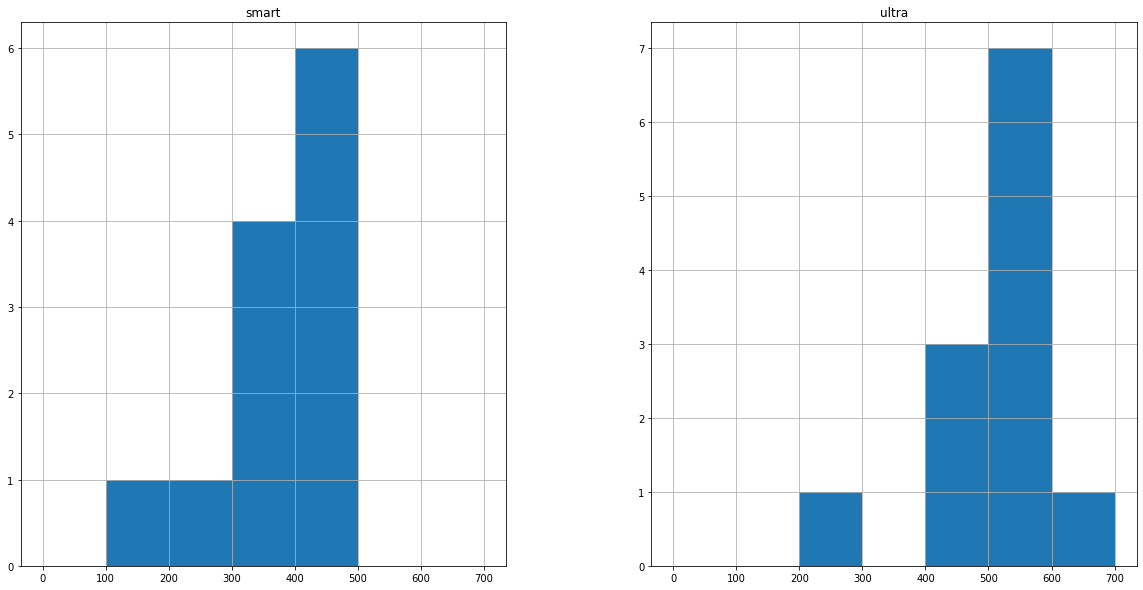

In [45]:
duration_tariff_mean.T.hist(figsize = (20, 10), bins = [0, 100, 200, 300, 400, 500, 600, 700]);

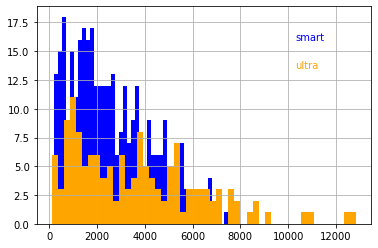

In [46]:
duration_tariff_smart_hist = duration_tariff_smart.fillna(0)
duration_tariff_smart_hist['sum'] = 0

duration_tariff_ultra_hist = duration_tariff_ultra.fillna(0)
duration_tariff_ultra_hist['sum'] = 0

for index in range(12):
    duration_tariff_smart_hist['sum'] += duration_tariff_smart_hist.loc[:, index + 1]

for index in range(12):
    duration_tariff_ultra_hist['sum'] += duration_tariff_ultra_hist.loc[:, index + 1]
    
duration_tariff_smart_hist['sum'].hist(bins = 50, color = 'blue').annotate('smart', (10300, 16), color = 'blue');
duration_tariff_ultra_hist['sum'].hist(bins = 50, color = 'orange').annotate('ultra', (10300, 13.5), color = 'orange');

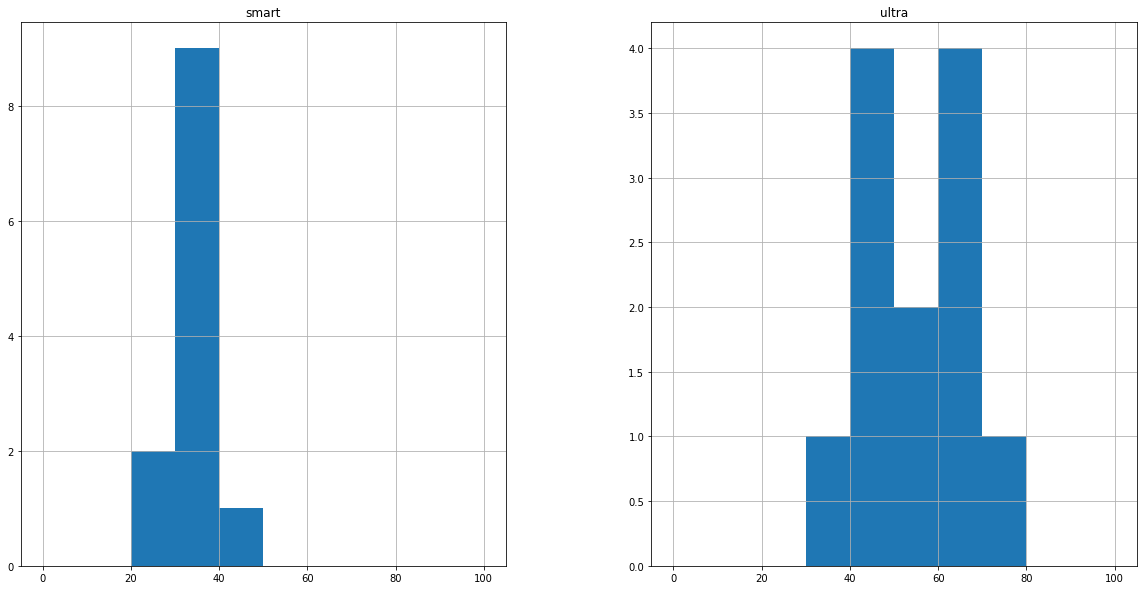

In [47]:
messages_tariff_mean.T.hist(figsize = (20, 10), bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);

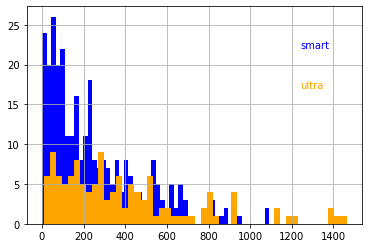

In [48]:
messages_tariff_smart_hist = messages_tariff_smart.fillna(0)
messages_tariff_smart_hist['sum'] = 0

messages_tariff_ultra_hist = messages_tariff_ultra.fillna(0)
messages_tariff_ultra_hist['sum'] = 0

for index in range(12):
    messages_tariff_smart_hist['sum'] += messages_tariff_smart_hist.loc[:, index + 1]

for index in range(12):
    messages_tariff_ultra_hist['sum'] += messages_tariff_ultra_hist.loc[:, index + 1]
    
messages_tariff_smart_hist['sum'].hist(bins = 50, color = 'blue').annotate('smart', (1240, 22), color = 'blue');
messages_tariff_ultra_hist['sum'].hist(bins = 50, color = 'orange').annotate('ultra', (1240, 17), color = 'orange');

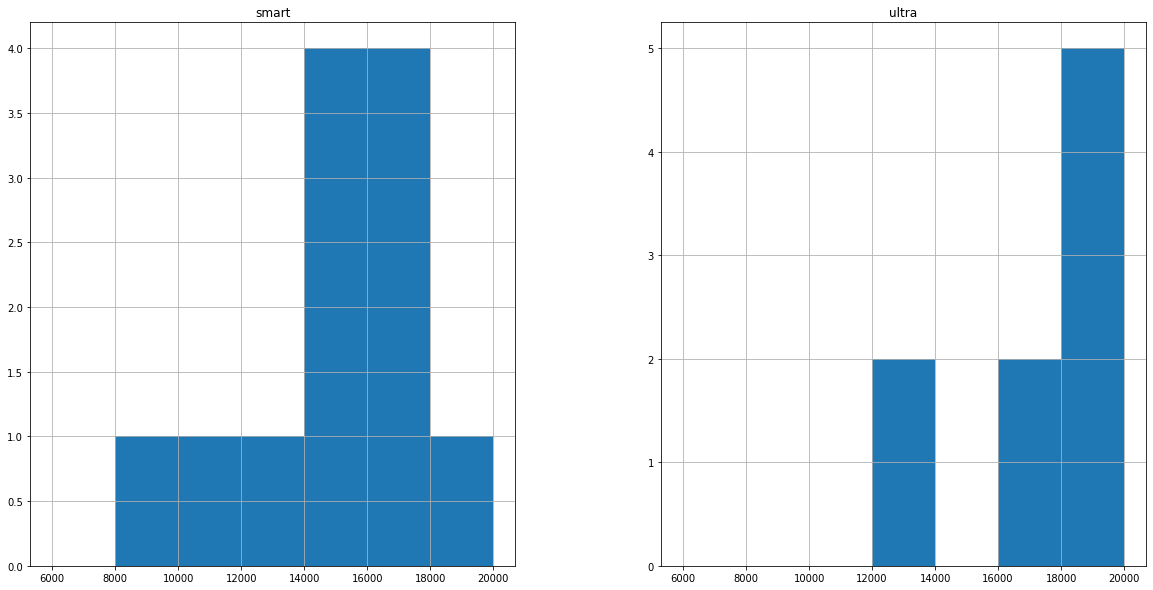

In [49]:
internet_tariff_mean.T.hist(figsize = (20, 10), bins = [6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000]);

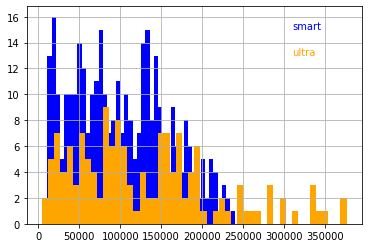

In [50]:
internet_tariff_smart_hist = internet_tariff_smart.fillna(0)
internet_tariff_smart_hist['sum'] = 0

internet_tariff_ultra_hist = internet_tariff_ultra.fillna(0)
internet_tariff_ultra_hist['sum'] = 0

for index in range(12):
    internet_tariff_smart_hist['sum'] += internet_tariff_smart_hist.loc[:, index + 1]

for index in range(12):
    internet_tariff_ultra_hist['sum'] += internet_tariff_ultra_hist.loc[:, index + 1]
    
internet_tariff_smart_hist['sum'].hist(bins = 50, color = 'blue').annotate('smart', (310000, 15), color = 'blue');
internet_tariff_ultra_hist['sum'].hist(bins = 50, color = 'orange').annotate('ultra', (310000, 13), color = 'orange');

На основе полученных данных можно сделать следующие выводы:

У клиентов тарифа "smart" средняя продолжительность звонков 365.88 минут (среднее отклонение - 171.93 минуты), большая часть располагается в интервале 300 - 500 минут, среднее количество сообщений - 36.26 (среднее отклонение - 25.01), большая часть располагается в интервале 30 - 40 сообщений, среднее количество интернет-трафика - 15064.32 Мбайт (среднее отклонение - 5753.15), большая часть располагается в интервале 14000 - 18000 Мбайт.

У клиентов тарифа "ultra" средняя продолжительность звонков 482.6 минут (среднее отклонение - 278.04), большая часть располагается в интервале 400 - 600 минут, среднее количество сообщений - 55.17 (среднее отклонение - 41.04), большая часть располагается в интервале 40 - 70 сообщений, среднее количество интернет-трафика - 18426.13 Мбайт (среднее отклонение - 9582.34), большая часть располагается в интервале 18000 - 20000 Мбайт.

Клиенты тарифа "ultra" по сравнению с клиентами тарифа "smart" используют: на 31.9% больше времени звонков, на 52.2% больше сообщений, на 22.3% больше интернет-трафика.

## Проверка гипотез

### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую гипотезу следующим образом: средняя выручка пользователей тарифа "ультра" равна средней выручки пользователей тарифа "смарт".

Альтернативная же гипотеза будет таковой: средние выручки пользователей тарифов "ультра" и "смарт" различаются.

Сформируем датасет, объединяющий выручку за 12 месяцев и название тарифа, а также разделим его на 2 датасета по тарифу:

In [51]:
df_income_12_months = df_income_12_months.merge(df_users, on = 'user_id')
df_income_12_months_hypoth1 = df_income_12_months[['user_id', 'income total per 1', 'income total per 2', 'income total per 3', 
                                                   'income total per 4', 'income total per 5', 'income total per 6', 
                                                   'income total per 7', 'income total per 8', 'income total per 9', 
                                                   'income total per 10', 'income total per 11', 'income total per 12', 'tariff']]

df_income_12_months_ultra = df_income_12_months_hypoth1[df_income_12_months_hypoth1['tariff'] == 'ultra']
df_income_12_months_smart = df_income_12_months_hypoth1[df_income_12_months_hypoth1['tariff'] == 'smart']

display(df_income_12_months_ultra.head(10))
df_income_12_months_smart.head(10)

,user_id,income total per 1,income total per 2,income total per 3,income total per 4,income total per 5,income total per 6,income total per 7,income total per 8,income total per 9,income total per 10,income total per 11,income total per 12,tariff
0,1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
3,1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
10,1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,ultra
13,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,ultra
14,1018,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
15,1019,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,NaN,NaN,ultra
17,1021,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
23,1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,ultra
34,1039,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra


,user_id,income total per 1,income total per 2,income total per 3,income total per 4,income total per 5,income total per 6,income total per 7,income total per 8,income total per 9,income total per 10,income total per 11,income total per 12,tariff
1,1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,smart
4,1005,550.0,550.0,934.0,1198.0,550.0,979.0,652.0,592.0,556.0,1348.0,610.0,685.0,smart
5,1007,NaN,NaN,NaN,550.0,1210.0,613.0,792.0,1828.0,793.0,550.0,1212.0,565.0,smart
6,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.0,smart
7,1009,NaN,NaN,550.0,550.0,550.0,750.0,2550.0,2350.0,1950.0,1550.0,950.0,1350.0,smart
8,1011,NaN,NaN,550.0,1150.0,1150.0,1013.0,1527.0,1750.0,1950.0,1213.0,2550.0,2150.0,smart
9,1012,NaN,NaN,550.0,950.0,2750.0,2550.0,2150.0,1950.0,1350.0,3350.0,1950.0,550.0,smart
11,1014,NaN,NaN,NaN,NaN,550.0,2550.0,3150.0,2750.0,2750.0,2153.0,2550.0,2559.0,smart
12,1015,NaN,NaN,NaN,550.0,1091.0,3040.0,2000.0,3004.0,1004.0,1046.0,1983.0,1622.0,smart
16,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1882.0,550.0,smart


Переформатируем датасеты в одномерные списки `df_income_12_months_smart_list` и `df_income_12_months_ultra_list`:

In [52]:
df_income_12_months_smart = df_income_12_months_smart[['income total per 1', 'income total per 2', 'income total per 3', 
                                           'income total per 4', 'income total per 5', 'income total per 6', 
                                           'income total per 7', 'income total per 8', 'income total per 9', 
                                           'income total per 10', 'income total per 11', 'income total per 12']]

df_income_12_months_ultra = df_income_12_months_ultra[['income total per 1', 'income total per 2', 'income total per 3', 
                                           'income total per 4', 'income total per 5', 'income total per 6', 
                                           'income total per 7', 'income total per 8', 'income total per 9', 
                                           'income total per 10', 'income total per 11', 'income total per 12']]

df_income_12_months_smart_array = np.array(df_income_12_months_smart, int).flatten()
df_income_12_months_smart_list = df_income_12_months_smart_array[df_income_12_months_smart_array > 0].tolist()

df_income_12_months_ultra_array = np.array(df_income_12_months_ultra, int).flatten()
df_income_12_months_ultra_list = df_income_12_months_ultra_array[df_income_12_months_ultra_array > 0].tolist()

Проведем тест на проверку гипотезы, определим значение `alpha` как `0.01`:

In [53]:
results_hypoth1 = st.ttest_ind(df_income_12_months_smart_list, df_income_12_months_ultra_list, equal_var = False)
alpha = 0.01

print('p-значение:', results_hypoth1.pvalue)

if results_hypoth1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.603862617164761e-209
Отвергаем нулевую гипотезу


Таким образом, нулевая гипотеза была опровергнута - выручки пользователей тарифов "ультра" и "смарт" разные.

### Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую гипотезу следующим образом: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Альтернативная же гипотеза будет таковой: средние выручки пользователей из Москвы и других регионов отличаются.

Сформируем датасет, объединяющий выручку за 12 месяцев и название города пользователя, а также разделим его на 2 датасета по критериям "Москва", "Другой город": 

In [55]:
df_income_12_months = df_income_12_months.merge(df_users, on = 'user_id')
df_income_12_months_hypoth2 = df_income_12_months[['user_id', 'income total per 1', 'income total per 2', 'income total per 3', 
                                                   'income total per 4', 'income total per 5', 'income total per 6', 
                                                   'income total per 7', 'income total per 8', 'income total per 9', 
                                                   'income total per 10', 'income total per 11', 'income total per 12', 'city']]
    
    
df_income_12_months_hypoth2.head(10) 

,user_id,income total per 1,income total per 2,income total per 3,income total per 4,income total per 5,income total per 6,income total per 7,income total per 8,income total per 9,income total per 10,income total per 11,income total per 12,city
0,1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,Краснодар
1,1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,Стерлитамак
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,Москва
3,1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,Новокузнецк
4,1005,550.0,550.0,934.0,1198.0,550.0,979.0,652.0,592.0,556.0,1348.0,610.0,685.0,Набережные Челны
5,1007,NaN,NaN,NaN,550.0,1210.0,613.0,792.0,1828.0,793.0,550.0,1212.0,565.0,Москва
6,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.0,Челябинск
7,1009,NaN,NaN,550.0,550.0,550.0,750.0,2550.0,2350.0,1950.0,1550.0,950.0,1350.0,Пермь
8,1011,NaN,NaN,550.0,1150.0,1150.0,1013.0,1527.0,1750.0,1950.0,1213.0,2550.0,2150.0,Самара
9,1012,NaN,NaN,550.0,950.0,2750.0,2550.0,2150.0,1950.0,1350.0,3350.0,1950.0,550.0,Санкт-Петербург


In [56]:
df_income_12_months_Moscow = df_income_12_months_hypoth2[df_income_12_months_hypoth2['city'] == 'Москва']
df_income_12_months_not_Moscow = df_income_12_months_hypoth2[df_income_12_months_hypoth2['city'] != 'Москва']

display(df_income_12_months_Moscow.head(10))
df_income_12_months_not_Moscow.head(10)

,user_id,income total per 1,income total per 2,income total per 3,income total per 4,income total per 5,income total per 6,income total per 7,income total per 8,income total per 9,income total per 10,income total per 11,income total per 12,city
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,Москва
5,1007,NaN,NaN,NaN,550.0,1210.0,613.0,792.0,1828.0,793.0,550.0,1212.0,565.0,Москва
26,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,832.0,757.0,Москва
28,1033,NaN,NaN,NaN,NaN,NaN,NaN,550.0,2031.0,2831.0,1640.0,2838.0,1816.0,Москва
33,1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950.0,550.0,950.0,Москва
35,1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3248.0,Москва
44,1051,NaN,NaN,NaN,NaN,NaN,550.0,1750.0,2150.0,550.0,NaN,NaN,NaN,Москва
49,1057,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,Москва
54,1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,550.0,Москва
56,1065,NaN,NaN,1556.0,2727.0,3216.0,2234.0,1807.0,2551.0,3174.0,1837.0,2513.0,550.0,Москва


,user_id,income total per 1,income total per 2,income total per 3,income total per 4,income total per 5,income total per 6,income total per 7,income total per 8,income total per 9,income total per 10,income total per 11,income total per 12,city
0,1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,Краснодар
1,1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,Стерлитамак
3,1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,Новокузнецк
4,1005,550.0,550.0,934.0,1198.0,550.0,979.0,652.0,592.0,556.0,1348.0,610.0,685.0,Набережные Челны
6,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.0,Челябинск
7,1009,NaN,NaN,550.0,550.0,550.0,750.0,2550.0,2350.0,1950.0,1550.0,950.0,1350.0,Пермь
8,1011,NaN,NaN,550.0,1150.0,1150.0,1013.0,1527.0,1750.0,1950.0,1213.0,2550.0,2150.0,Самара
9,1012,NaN,NaN,550.0,950.0,2750.0,2550.0,2150.0,1950.0,1350.0,3350.0,1950.0,550.0,Санкт-Петербург
10,1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,Иваново
11,1014,NaN,NaN,NaN,NaN,550.0,2550.0,3150.0,2750.0,2750.0,2153.0,2550.0,2559.0,Чебоксары


Переформатируем датасеты в одномерные списки `df_income_12_months_Moscow_list` и `df_income_12_months_not_Moscow_list`:

In [57]:
df_income_12_months_Moscow = df_income_12_months_Moscow[['income total per 1', 'income total per 2', 'income total per 3', 
                                           'income total per 4', 'income total per 5', 'income total per 6', 
                                           'income total per 7', 'income total per 8', 'income total per 9', 
                                           'income total per 10', 'income total per 11', 'income total per 12']]

df_income_12_months_not_Moscow = df_income_12_months_not_Moscow[['income total per 1', 'income total per 2', 'income total per 3', 
                                           'income total per 4', 'income total per 5', 'income total per 6', 
                                           'income total per 7', 'income total per 8', 'income total per 9', 
                                           'income total per 10', 'income total per 11', 'income total per 12']]

df_income_12_months_Moscow_array = np.array(df_income_12_months_Moscow, int).flatten()
df_income_12_months_Moscow_list = df_income_12_months_Moscow_array[df_income_12_months_Moscow_array > 0].tolist()

df_income_12_months_not_Moscow_array = np.array(df_income_12_months_not_Moscow, int).flatten()
df_income_12_months_not_Moscow_list = df_income_12_months_not_Moscow_array[df_income_12_months_not_Moscow_array > 0].tolist()

Проведем тест на проверку гипотезы, определим значение `alpha` как `0.01`:

In [58]:
results_hypoth2 = st.ttest_ind(df_income_12_months_Moscow_list, df_income_12_months_not_Moscow_list, equal_var = False)
alpha = 0.01

print('p-значение:', results_hypoth2.pvalue)

if results_hypoth2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10028641611611423
Не получилось отвергнуть нулевую гипотезу


Таким образом, нулевую гипотезу нельзя отвергнуть, средняя выручка пользователей из Москвы может и не отличаться от средней выручки пользователей из других регионов.

## Выводы

Таким образом, было проведено исследование, в ходе которого были изучены данные, произведена их подготовка, анализ и проверены гипотезы.

Во время подготовки данных были исправлены ошибки, данные приведены к нужным типам. Также были дополнительно определены количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячная выручка с каждого пользователя.

Во время анализа данных было изучено поведение клиентов оператора, исходя из выборки. У клиентов тарифа "smart" средняя продолжительность звонков 365.88 минут (среднее отклонение - 171.93 минуты), большая часть располагается в интервале 300 - 500 минут, среднее количество сообщений - 36.26 (среднее отклонение - 25.01), большая часть располагается в интервале 30 - 40 сообщений, среднее количество интернет-трафика - 15064.32 Мбайт (среднее отклонение - 5753.15), большая часть располагается в интервале 14000 - 18000 Мбайт. У клиентов тарифа "ultra" средняя продолжительность звонков 482.6 минут (среднее отклонение - 278.04), большая часть располагается в интервале 400 - 600 минут, среднее количество сообщений - 55.17 (среднее отклонение - 41.04), большая часть располагается в интервале 40 - 70 сообщений, среднее количество интернет-трафика - 18426.13 Мбайт (среднее отклонение - 9582.34), большая часть располагается в интервале 18000 - 20000 Мбайт. Клиенты тарифа "ultra" по сравнению с клиентами тарифа "smart" используют: на 31.9% больше времени звонков, на 52.2% больше сообщений, на 22.3% больше интернет-трафика.

Во время проверки гипотез были получены следующие результаты:

Первая гипотеза: p-значение составило 2.46e-230, нулевая гипотеза была отвергнута, результат проверки - выручки пользователей тарифов "ультра" и "смарт" разные.

Вторая гипотеза: p-значение: 0.1, нулевая гипотеза не была отвергнута, результат проверки - средняя выручка пользователей из Москвы может и не отличаться от средней выручки пользователей из других регионов.

Таким образом, можно сделать вывод: более выгодный тариф для компании - "ультра". Хотя и большинство клиентов используют тариф смарт, средняя выручка от клиентов, использующий тариф "ультра", выше.